In [1]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [3]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/akshatgupta/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [4]:
all_pos_tw = twitter_samples.strings('positive_tweets.json')
all_neg_tw = twitter_samples.strings('negative_tweets.json')

In [5]:
tweets = all_pos_tw + all_neg_tw
labels = np.append(np.ones((len(all_pos_tw))),np.zeros((len(all_neg_tw))))

In [6]:
train_x = all_pos_tw[:4000] + all_neg_tw[:4000]

In [7]:
import pandas as pd

data = pd.read_csv("logistic_features.csv")
data.head(10)

,bias,positive,negative,sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0
5,1.0,2955.0,119.0,1.0
6,1.0,3934.0,538.0,1.0
7,1.0,3162.0,276.0,1.0
8,1.0,628.0,189.0,1.0
9,1.0,264.0,112.0,1.0


In [8]:
X = data[['bias','positive','negative']].values
Y = data['sentiment'].values

In [9]:
theta = [6.03518871e-08, 5.38184972e-04, -5.58300168e-04]

Text(0, 0.5, 'Negative')

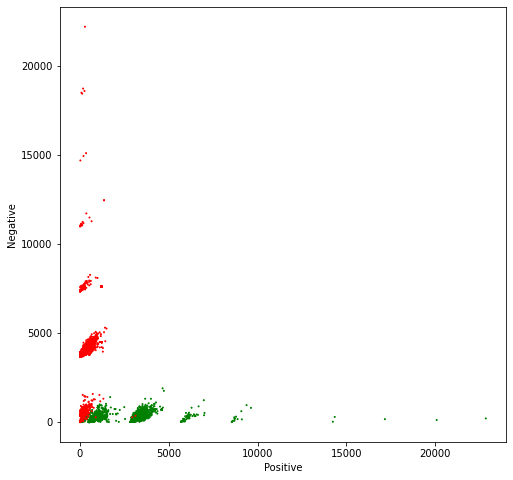

In [10]:
fig, ax = plt.subplots(figsize = (8, 8))
colors = ['red', 'green']
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 1)
plt.xlabel("Positive")
plt.ylabel("Negative")

In [11]:
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

def direction(theta, pos):
    return pos * theta[2] / theta[1]

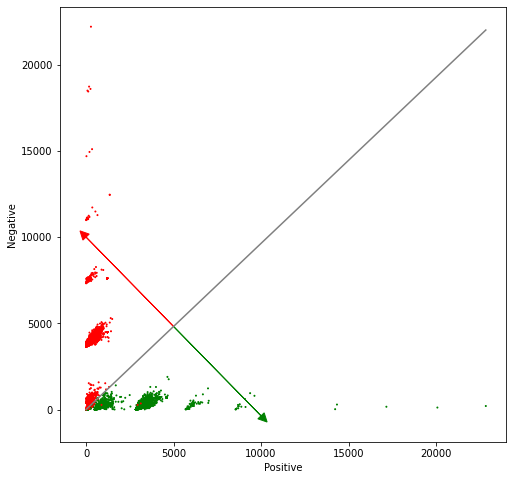

In [12]:
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 1)
plt.xlabel("Positive")
plt.ylabel("Negative")

maxpos = np.max(X[:,1])
offset = 5000

ax.plot([0,  maxpos], [neg(theta, 0),   neg(theta, maxpos)], color = 'gray') 
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()